# 🚴‍♂️ Bike Sharing Demand Prediction Project Overview

## 📚 Introduction
This project aims to predict the demand for bike sharing systems based on various environmental and seasonal factors. By analyzing historical data, we can build a predictive model that helps in optimizing bike availability, improving user satisfaction, and enhancing the overall bike-sharing experience.

## 📊 Datasets
1. **Train Dataset**: Contains historical records of bike rentals, including datetime, season, weather conditions, temperature, and more.
2. **Test Dataset**: Used for making predictions based on the trained model.
3. **Sample Submission**: A template for submitting predictions, containing the required format for the output.

## 🔍 Data Exploration
- **Previewing Datasets**: Display the first few rows of the train and test datasets to understand the structure and types of data.
- **Missing Values**: Identify any missing values within the datasets to ensure data integrity.
  
## 📈 Correlation Analysis
- **Correlation Heatmap**: Visualize the relationships between features and the target variable (`count` of bike rentals). This step aids in understanding which features most significantly influence demand.

## 📅 Data Preprocessing
- **Datetime Conversion**: Convert the `datetime` column to a suitable format for extracting relevant time-based features (e.g., hour, day, month).
- **Feature Selection**: Determine the most impactful features for the prediction model and prepare the data for training.

## 🧠 Model Training
- **Choosing the Model**: Select appropriate regression algorithms (e.g., Linear Regression, Random Forest) to predict bike demand.
- **Model Evaluation**: Use metrics such as RMSE and R² to evaluate model performance during training and validation.

## 🚀 Prediction
- **Making Predictions**: Utilize the trained model to make predictions on the test dataset and generate results for submission.

## 📥 Submission
- **Format Output**: Prepare the final predictions in the required format for submission.
- **Save Submission**: Save the predictions to a CSV file for easy submission to the competition platform.

## 🔧 Conclusion
This project encapsulates the process of data collection, exploration, preprocessing, modeling, and prediction for bike sharing demand. The insights derived from the analysis can guide decision-makers in optimizing bike-sharing systems, thereby enhancing user experience and operational efficiency.

# 📦 Import Necessary Libraries
In this section, we import the libraries required for data manipulation, analysis, model training, and deployment.

- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical computations.
- **XGBoost**: An efficient and scalable implementation of gradient boosting for regression tasks.
- **Scikit-learn**: For splitting the dataset into training and validation sets, and evaluating model performance.
- **Matplotlib & Seaborn**: For creating visualizations and statistical data visualization.
- **Joblib**: For saving and loading models.
- **Flask**: For creating a web application that can serve predictions.

In [1]:
# Import necessary libraries

In [2]:
import pandas as pd  # For data manipulation and analysis

In [3]:
import numpy as np  # For numerical computations

In [4]:
from xgboost import XGBRegressor  # XGBoost regression model for predictions

In [5]:
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and validation sets

In [6]:
from sklearn.metrics import mean_squared_error  # For evaluating model performance

In [7]:
import matplotlib.pyplot as plt  # For creating visualizations

In [8]:
import seaborn as sns  # For statistical data visualization

In [9]:
import joblib  # For saving and loading models

In [10]:
from flask import Flask, request, jsonify  # For creating a web application

## 📂 Define Paths to Datasets
This section sets the paths for the training, testing, and sample submission datasets, allowing easy access when loading the data later.

- **`train_path`**: Path to the training dataset.
- **`test_path`**: Path to the test dataset.
- **`sample_submission_path`**: Path to the sample submission dataset.

In [11]:
# Define the paths to the datasets

In [12]:
train_path = '/content/train.csv'  # Path to the training dataset

In [13]:
test_path = '/content/test.csv'  # Path to the test dataset

In [14]:
sample_submission_path = '/content/sampleSubmission.csv'  # Path to the sample submission dataset

## 📥 Load the Datasets
Here, we load the datasets into DataFrames using Pandas, allowing us to manipulate and analyze the data.

- **`train_df`**: DataFrame containing the training dataset.
- **`test_df`**: DataFrame containing the test dataset.
- **`sample_submission_df`**: DataFrame containing the sample submission data.

In [15]:
# Load the datasets

In [16]:
train_df = pd.read_csv(train_path)  # Load the training dataset into a DataFrame

In [17]:
test_df = pd.read_csv(test_path)  # Load the test dataset into a DataFrame

In [18]:
sample_submission_df = pd.read_csv(sample_submission_path)  # Load the sample submission dataset into a DataFrame

## 👀 Display the First Few Rows of Each Dataset
This step allows us to preview the data we are working with to understand its structure and contents.

- Print statements are used to display the first few rows of the training, test, and sample submission datasets.

In [19]:
# Display the first few rows of each dataset

In [20]:
print("Train Dataset Preview:")  # Print a message before displaying the training dataset
print(train_df.head(), "\n")  # Display the first few rows of the training dataset

Train Dataset Preview:
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1   



In [21]:
print("Test Dataset Preview:")  # Print a message before displaying the test dataset
print(test_df.head(), "\n")  # Display the first few rows of the test dataset

Test Dataset Preview:
              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014   



In [22]:
print("Sample Submission Dataset Preview:")  # Print a message before displaying the sample submission dataset
print(sample_submission_df.head(), "\n")  # Display the first few rows of the sample submission dataset

Sample Submission Dataset Preview:
              datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0 



## 🧐 Check for Missing Values
We check for missing values in the training dataset to identify any columns that may require data cleaning or imputation.

- The `.isnull().sum()` function is used to display the count of missing values for each column in the training dataset.

In [23]:
# Check for missing values

In [24]:
print("\nMissing Values in Train Dataset:")  # Print a message before checking for missing values
print(train_df.isnull().sum())  # Display the count of missing values for each column in the training dataset


Missing Values in Train Dataset:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


## 📊 Visualize the Distribution of the Target Variable
This section visualizes the distribution of the target variable (`count`) in the training dataset using a histogram.

- **Histogram**: Displays the frequency distribution of the target variable, helping us understand its skewness and range.

In [25]:
# Visualize the distribution of the target variable

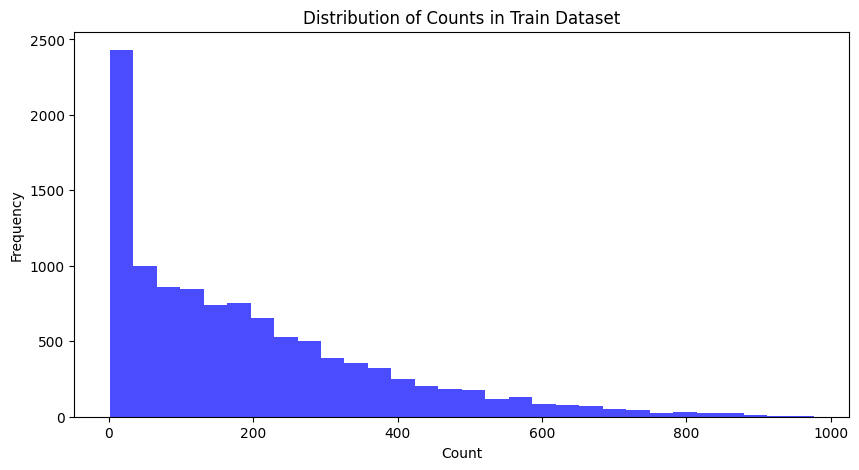

In [26]:
plt.figure(figsize=(10, 5))  # Set the figure size for the histogram
plt.hist(train_df['count'], bins=30, alpha=0.7, color='blue')  # Plot histogram of the target variable 'count'
plt.xlabel('Count')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.title('Distribution of Counts in Train Dataset')  # Title of the histogram
plt.savefig('count_distribution.pdf')  # Save the histogram as a PDF file
plt.show()  # Display the histogram

## 🔍 Visualize Correlations Between Features and Target Variable
Here, we calculate and visualize the correlation matrix to explore relationships between features and the target variable.

- **Correlation Heatmap**: Provides a visual representation of how features correlate with one another and with the target variable.

In [27]:
# Visualize correlations between features and the target variable

In [28]:
correlation_matrix = train_df.drop(columns=['datetime']).corr()  # Drop 'datetime' before calculating correlation

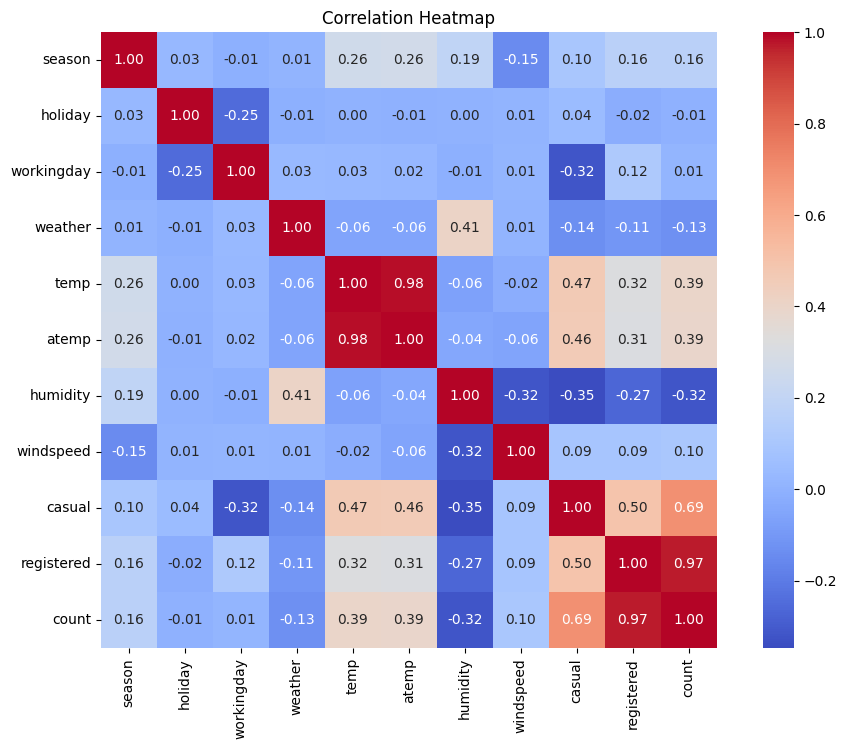

In [29]:
plt.figure(figsize=(12, 8))  # Set the figure size for the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)  # Plot the heatmap with annotations
plt.title('Correlation Heatmap')  # Title for the heatmap
plt.show()  # Display the heatmap

## 📈 Visualize Feature Distributions
This section visualizes the distributions of selected features using histograms, helping us understand their spread and characteristics.

- Features visualized: `temp`, `atemp`, `humidity`, `windspeed`, `season`, `weather`.

In [30]:
# Visualize feature distributions

In [31]:
features = ['temp', 'atemp', 'humidity', 'windspeed', 'season', 'weather']  # List of features to visualize

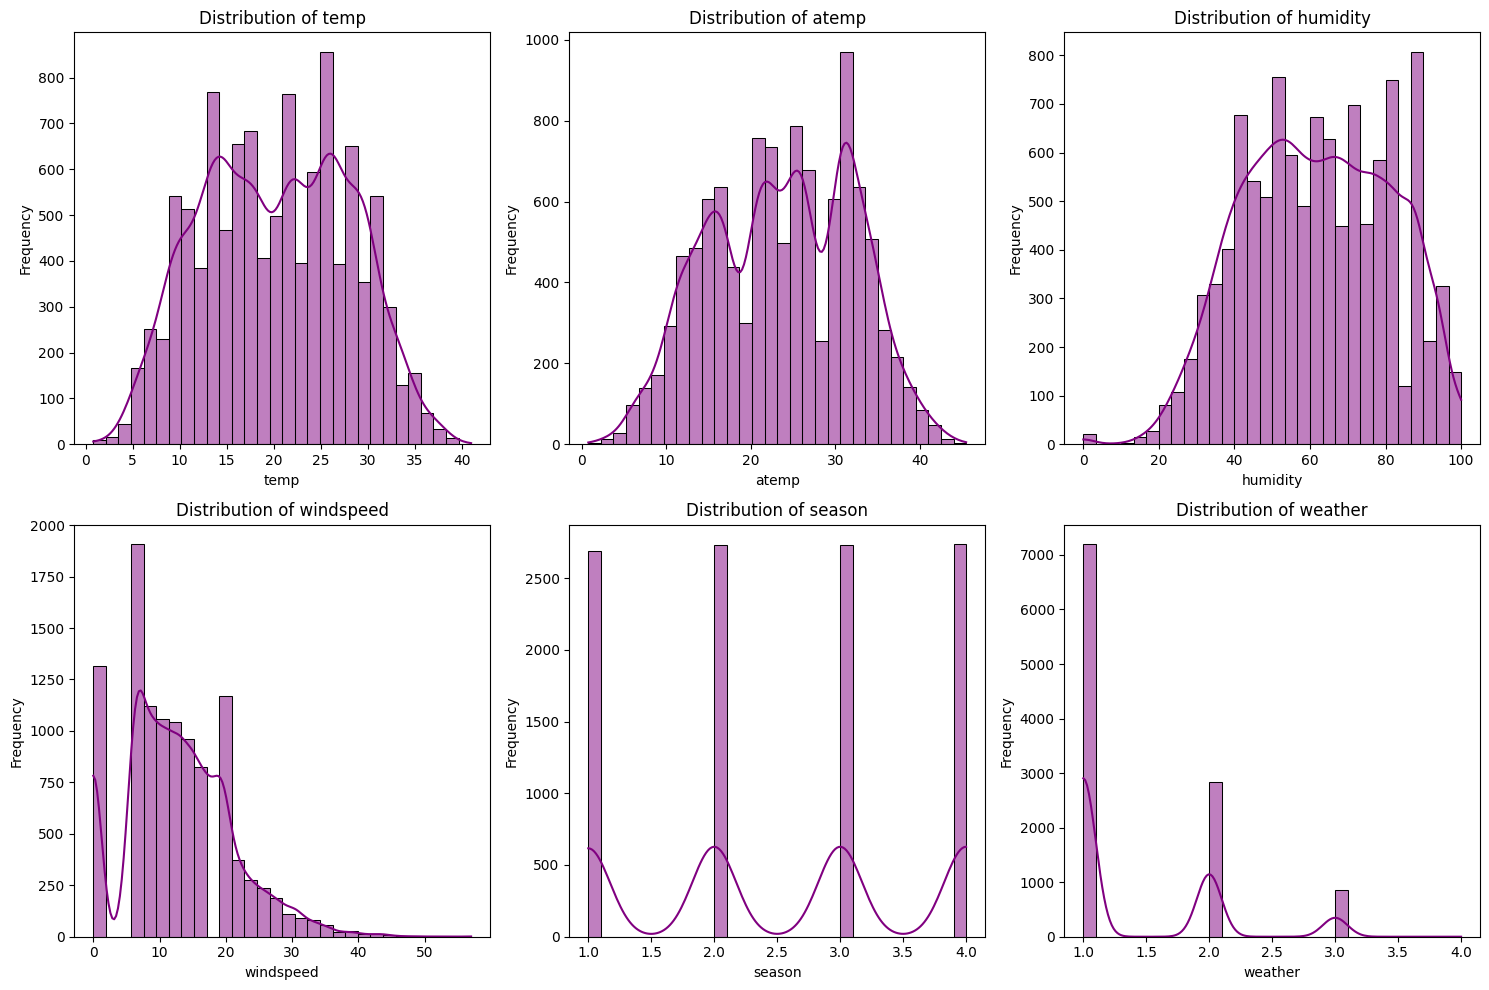

In [32]:
plt.figure(figsize=(15, 10))  # Set the figure size for feature distributions
for i, feature in enumerate(features):  # Loop through each feature
    plt.subplot(2, 3, i + 1)  # Create a subplot for each feature
    sns.histplot(train_df[feature], bins=30, kde=True, color='purple')  # Plot histogram and KDE for the feature
    plt.title(f'Distribution of {feature}')  # Title for the current feature's plot
    plt.xlabel(feature)  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.savefig('feature_distributions.pdf')  # Save the feature distributions as a PDF file
plt.show()  # Display the feature distributions

## ⏳ Convert 'datetime' to Datetime Object
In this step, we convert the 'datetime' column in both the training and test datasets to a datetime object for easier manipulation.

In [33]:
# Convert 'datetime' to datetime object

In [34]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])  # Convert 'datetime' column in training dataset to datetime format


In [35]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'])  # Convert 'datetime' column in test dataset to datetime format


## 🛠️ Feature Engineering: Extract Features from Datetime
Here, we extract additional features from the 'datetime' column, which can improve model performance.

- Features extracted: `year`, `month`, `day`, `hour`.

In [36]:
# Feature Engineering: Extract features from the datetime

In [37]:
train_df['year'] = train_df['datetime'].dt.year  # Extract the year from the 'datetime' column in the training dataset


In [38]:
train_df['month'] = train_df['datetime'].dt.month  # Extract the month from the 'datetime' column in the training dataset


In [39]:
train_df['day'] = train_df['datetime'].dt.day  # Extract the day from the 'datetime' column in the training dataset

In [40]:
train_df['hour'] = train_df['datetime'].dt.hour  # Extract the hour from the 'datetime' column in the training dataset


In [41]:
test_df['year'] = test_df['datetime'].dt.year  # Extract the year from the 'datetime' column in the test dataset

In [42]:
test_df['month'] = test_df['datetime'].dt.month  # Extract the month from the 'datetime' column in the test dataset

In [43]:
test_df['day'] = test_df['datetime'].dt.day  # Extract the day from the 'datetime' column in the test dataset

In [44]:
test_df['hour'] = test_df['datetime'].dt.hour  # Extract the hour from the 'datetime' column in the test dataset

## ⚙️ Prepare Features and Target Variable
This section defines the feature set (`X`) and the target variable (`y`) for training the model.

- `X`: Selected features used for training the model.
- `y`: The target variable (`count`) we want to predict.

In [45]:
# Prepare the features and target variable

In [46]:
X = train_df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']]  # Select features for training


In [47]:
y = train_df['count']  # Define the target variable

## 🔄 Split the Training Data into Train and Validation Sets
We split the training data into training and validation sets to evaluate model performance and prevent overfitting.

- **`train_test_split`**: Function used to split the data, with 20% reserved for validation.

In [48]:
# Split the training data into train and validation sets

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data into training and validation sets


## 🏋️ Initialize and Train the XGBoost Model
In this step, we initialize and train the XGBoost regression model using the training data.

- **XGBoost Model**: Configured with the objective of minimizing squared error.

In [50]:
# Initialize and train the XGBoost model

In [51]:
model = XGBRegressor(objective='reg:squarederror')  # Initialize the XGBoost model with the specified objective

In [52]:
model.fit(X_train, y_train)  # Train the model using the training data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 🔮 Make Predictions on the Validation Set
Here, we use the trained model to predict the target variable for the validation set.

- **Predictions**: Generated for the validation set to evaluate model performance.

In [53]:
# Make predictions on the validation set

In [54]:
y_pred = model.predict(X_val)  # Predict the target variable for the validation set

## 📏 Evaluate Model Performance
We evaluate the performance of the model using the mean squared error (MSE) metric to quantify prediction accuracy.

- **MSE**: Provides insight into the average squared difference between predicted and actual values.

In [55]:
# Evaluate the model performance

In [56]:
mse = mean_squared_error(y_val, y_pred)  # Calculate the mean squared error between actual and predicted values

In [57]:
print(f'Mean Squared Error: {mse}')  # Print the mean squared error

Mean Squared Error: 1590.4501067821907


## 🔮 Make Predictions on the Test Dataset
This section prepares the test dataset for predictions using the trained model.

- **`X_test`**: Selected features from the test dataset used for making predictions.

In [58]:
# Make predictions on the test dataset

In [59]:
X_test = test_df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']]  # Prepare features for the test set


In [60]:
test_predictions = model.predict(X_test)  # Predict the target variable for the test set

## 📑 Prepare the Submission DataFrame
We create a submission DataFrame by adding the predictions to the sample submission DataFrame.

- **Submission DataFrame**: Contains predictions in the 'count' column and is saved as a CSV file for submission.

In [61]:
# Prepare the submission DataFrame

In [62]:
submission_data = sample_submission_df.copy()  # Create a copy of the sample submission DataFrame

In [63]:
submission_data['count'] = test_predictions  # Add predictions to the 'count' column

In [64]:
submission_data.to_csv('/content/bike_sharing_predictions.csv', index=False)  # Save the submission DataFrame as a CSV file


## 📊 Optional: Visualize Predictions vs Actual Counts
This optional step visualizes the relationship between actual and predicted counts from the validation dataset.

- **Scatter Plot**: Helps assess the model's prediction accuracy by comparing actual and predicted values.

In [65]:
# Optional: Visualize predictions vs actual counts from validation

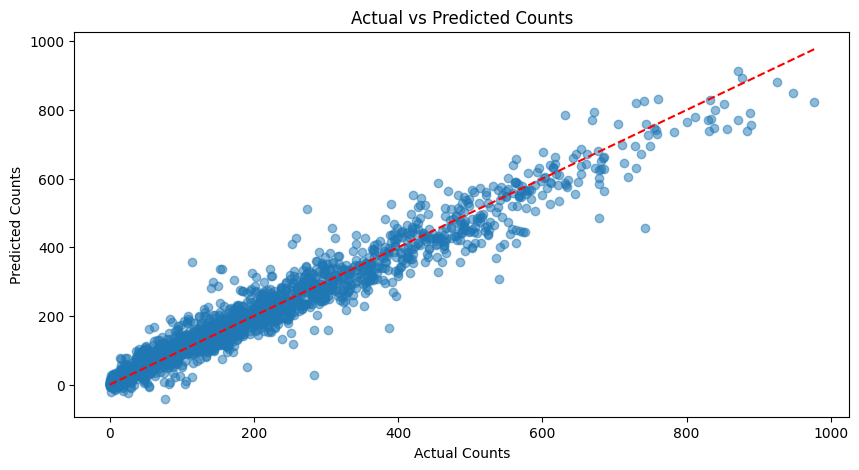

In [66]:
plt.figure(figsize=(10, 5))  # Set the figure size for the scatter plot
plt.scatter(y_val, y_pred, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([0, max(y_val)], [0, max(y_val)], '--r')  # Plot a reference line for perfect predictions
plt.xlabel('Actual Counts')  # Label for the x-axis
plt.ylabel('Predicted Counts')  # Label for the y-axis
plt.title('Actual vs Predicted Counts')  # Title for the scatter plot
plt.savefig('actual_vs_predicted.pdf')  # Save the scatter plot as a PDF file
plt.show()  # Display the scatter plot

## 💾 Save the Model for Deployment
We save the trained model using Joblib for later use or deployment.

- **Model File**: Saved with a `.joblib` extension for easy loading in the future.

In [67]:
# Save the model for deployment

In [68]:
joblib.dump(model, 'bike_sharing_model.joblib')  # Save the trained model to a file

['bike_sharing_model.joblib']

## 🚀 Deployment Using Flask
In this final section, we set up a Flask application to serve predictions based on incoming requests.

- **Flask App**: Defines a `/predict` route that processes JSON input and returns predictions.

In [69]:
# Deployment using Flask

In [70]:
app = Flask(__name__)  # Create a Flask application instance

In [71]:
@app.route('/predict', methods=['POST'])  # Define a route for prediction with POST method
def predict():  # Function to handle prediction requests
    data = request.get_json(force=True)  # Get JSON data from the request
    input_features = np.array([data['season'], data['holiday'], data['workingday'],  # Create an array of input features
                               data['weather'], data['temp'], data['atemp'],
                               data['humidity'], data['windspeed'],
                               data['year'], data['month'], data['day'], data['hour']]).reshape(1, -1)  # Reshape input for prediction
    prediction = model.predict(input_features)  # Make prediction using the model
    return jsonify({'count': prediction[0]})  # Return the prediction as JSON

In [72]:
if __name__ == '__main__':  # Check if the script is executed directly
    app.run(debug=True)  # Run the Flask application in debug mode

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


# 🔚 Conclusion

In this final step, we will summarize the project outcomes and insights gained.

## 📝 Summary
1. **Project Objectives**: Reflect on the objectives of predicting bike sharing demand and how the analysis and modeling contributed to achieving those goals.
2. **Future Work**: Consider potential improvements and future directions for the project, including exploring additional features or different modeling techniques.

### 📌 Note
Documenting insights and findings will be beneficial for future reference and sharing with collaborators or stakeholders.